The config attributes {'add_watermarker': None} were passed to StableDiffusionXLPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'add_watermarker': None} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

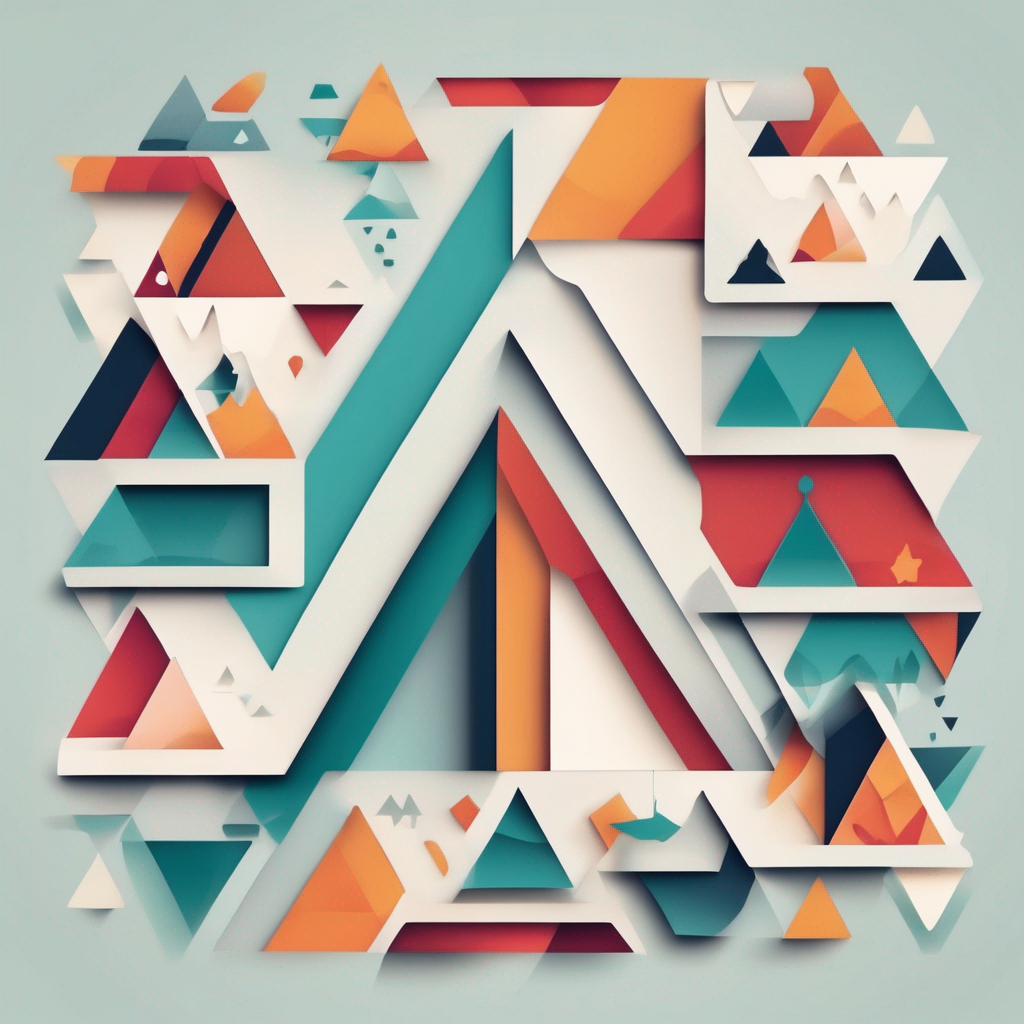

In [50]:
import torch
from diffusers import DiffusionPipeline

MODEL = "stabilityai/stable-diffusion-xl-base-1.0"
# MODEL = "stabilityai/sdxl-turbo"
SEED = 23484274

pipe = DiffusionPipeline.from_pretrained(MODEL)
pipe = pipe.to("mps")

#prompt = "A teenage skateboarder, walking towards the camera down a city street, photo-realistic, sharp focus."
#prompt = "A space scene photo taken while standing on a remote planet, photo-realistic, sharp focus, cinematic lighting."
#prompt = "A television new studio desk and background, high color, photo-realistic."
#prompt = "A photo-realistic image of a white goldendoodle, with a sharp focus, and a blurred background."

# obj = "a violin" # Software practice article
# obj = "document and quill pen" # Technical doc article
# obj = "computer keyboard" # Shortcut article
# obj = "pile of credit cards" # Technical Debt article
# obj = "piggy bank sitting on coins" # Repayment plans article
obj = "a large group of people in a circle" # Shape of engineering team article

# Isometric style
# prompt = f"isometric style {obj} . vibrant, beautiful, crisp, detailed, ultra detailed, intricate"
# negative_prompt = f"deformed, mutated, ugly, disfigured, blur, blurry, noise, noisy, realistic, photographic"

# Line art style
# prompt = f"line art drawing {obj} . professional, sleek, modern, minimalist, graphic, line art, vector graphics"
# negative_prompt = f"anime, photorealistic, 35mm film, deformed, glitch, blurry, noisy, off-center, deformed, cross-eyed, closed eyes, bad anatomy, ugly, disfigured, mutated, realism, realistic, impressionism, expressionism, oil, acrylic"

# Pixel art style
# prompt = f"pixel-art {obj} . low-res, blocky, pixel art style, 8-bit graphics"
#negative_prompt = "sloppy, messy, blurry, noisy, highly detailed, ultra textured, photo, realistic"

# Architecture style
#prompt = f"architectural style {obj} . clean lines, geometric shapes, minimalist, modern, architectural drawing, highly detailed"
#negative_prompt = "curved lines, ornate, baroque, abstract, grunge"

# Minimalist style
# prompt = f"minimalist style {obj} . simple, clean, uncluttered, modern, elegant"
# negative_prompt = "ornate, complicated, highly detailed, cluttered, disordered, messy, noisy"

# Papercut style
prompt = f"flat papercut style {obj} . silhouette, clean cuts, paper, sharp edges, minimalist, color block"
negative_prompt = "3D, high detail, noise, grainy, blurry, painting, drawing, photo, disfigured"

# Tilt shift style
# prompt = f"tilt-shift photo of {prompt} . selective focus, miniature effect, blurred background, highly detailed, vibrant, perspective control"
# negative_prompt = "blurry, noisy, deformed, flat, low contrast, unrealistic, oversaturated, underexposed" 

generator = [torch.Generator(device="mps").manual_seed(SEED)]
image = pipe(prompt=prompt, negative_prompt=negative_prompt, num_images_per_prompt=1, generator=generator).images[0]
image